# Central Limit Theorem

Let's use the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) in a dataset.

Take a population and measure a value (size, weight, etc.) for each individual.

The important thing to know is that **whatever** the form of the distribution over the population, the **sampling** distribution tends to a Gaussian, and its dispersion is given by the Central Limit Theorem.

Let's verify this experimentally!

---

## Let's start

Run the following cell to import modules for the livecode

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

❓ Load the `"total_bill"` dataset from seaborn into a `df` variable and display the head

<details>
    <summary>💡 View hint</summary>
    You can use <a href="https://seaborn.pydata.org/generated/seaborn.load_dataset.html"><code>seaborn.load_dataset</code></a>
</details>

In [2]:
df = sns.load_dataset('tips')
#total_bill = tips_df['total_bill']


❓ How many rows are available in the dataset?

In [ ]:
df.shape

❓ Plot the distribution of the `total_bill` column in the restaurant

In [ ]:
sns.displot(x='total_bill', data=df);

❓ What is the [**skewness**](https://whatis.techtarget.com/definition/skewness) value of this distribution?

In [ ]:
stats.skew(df['total_bill'])

❓ Create variables `mu` and `sigma` storing the mean and standard deviation of the distribution of tips

In [3]:
mu = np.mean(df['total_bill'])
sigma = np.std(df['total_bill'])

In [ ]:
print(f'mu = {mu}')
print(f'std = {sigma}')

## Sampling

❓ Pick randomly and with replacement, 10 rows of the dataset, and compute the mean $\bar{x}$ of that sample.

Run this cell a few times, do you get the same result each time? Is this expected?

In [ ]:
import random

np.mean(random.choices(df['total_bill'], k=100))

#OR

np.mean(df.sample(10, replace = True)['total_bill'])

❓ Create a `means` list storing a list of means of $N$ samples of size $n$.

Start with $n = 5$ and $N = 10$

In the same cell, **plot** the distribution of `means`. With $n$ constant, increase $N$ and observe. Then increase $n$ and test another range of $N$. What do you observe?

Try and plot a grid of 6 distributions for $ n \in \{ 1, 5, 50, 100, 500, 1000 \}$

In [ ]:
means = []

n = 500# size of each sample
N = 10000 # number of samples

for i in range(N):
    means.append(np.mean(df.sample(n, replace = True)['total_bill']))
    
means

sns.displot(means);

In [ ]:
#means = []

n = 1000# size of each sample
ns = [1,5,50,100,500,1000]

plt.figure(figsize=(15,8))

for index , n in enumerate(ns):
    temp_means = []
    
    for i in range(N):
        temp_means.append(np.mean(df.sample(n, replace = True)['total_bill']))
    
    plt.subplot(2, 3, index + 1)
    plt.hist(temp_means)
    plt.xlabel(n)
    #plt.xlim((5,50))
    

## Checking the CLT

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/400px-IllustrationCentralTheorem.png)

❓ Let's verify the Central Limit Theorem computationally:

For each value of `n`:
- Compare `mu` with the mean of means
- Compare `sigma` with the standard deviation of the means, (don't forget the $\sqrt n$ adjustment)
- Compute the `skewness` of the sampling distribution

In [ ]:
ns


In [ ]:
for index , n in enumerate(ns):
    temp_means = []
    
    for i in range(N):
        temp_means.append(np.mean(df.sample(n, replace = True)['total_bill']))

    print(f'mu diff: {round(abs(mu - np.mean(temp_means)), 4)}')
    print(f'std diff: {round(abs(sigma/np.sqrt(n)- np.std(temp_means)), 4)}') 
    print(f'skew diff: {round(stats.skew(temp_means), 4)}')

## Probability

Imagine I take 100 rows from the dataset. What is the probability that the cumulated total bill is **lower than 1800€**? 

❓ Plot `pdf` from [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) using `mu`, `sigma` and `n` for the distribution of samples of total bills.

In [6]:
n = 100

our_distribution = stats.norm(mu, sigma/np.sqrt(n))

In [ ]:
x = np.linspace(15, 25, num=200)
y = our_distribution.pdf(x)

In [ ]:
plt.plot(x,y);


❓ What is the probability we are looking for? Use the `cdf` method to find it.

In [ ]:
x = np.linspace(15, 25, num=200)
y = our_distribution.cdf(x)

In [ ]:
plt.plot(x,y);


In [ ]:
our_distribution.cdf(18)

❓ Compute the z-score for the value `18€`

In [7]:
# Z = (x - mu) / sigma
#n=100

z = (18 - mu) / (sigma / np.sqrt(n))

z

#### It´s must be -2.010

-2.01025703843809

❓ Plot the normal distribution (0, 1) and a red dot for the target (use the `pdf`)

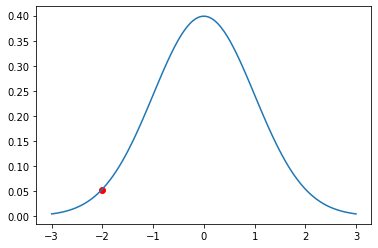

In [14]:
new_distribution = stats.norm(0, 1)

x = np.linspace(-3, 3, num=100)
y = new_distribution.pdf(x)

plt.plot(x,y)
plt.scatter(z, new_distribution.pdf(z), color = 'red')

plt.show()

In [15]:
new_distribution.cdf(z)

0.022201995667127494